In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sir_spreading import SIR_classical
from sir_spreading import SIR_threshold
from sir_spreading import SIR_cascade

from visualise_spreading import get_starting_nodes
from visualise_spreading import get_spreading_data
from visualise_spreading import visualise_spreading

import warnings
warnings.filterwarnings('ignore')

In [3]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')

In [4]:
# Define metrics
metrics = ['random', 'degree'] #['random', 'degree', 'closeness', 'betweenness', 'eigenvector', 'harmonic']

# Get starting nodes
starting_nodes = {f'{metric}': get_starting_nodes(G, metric, 1) for metric in metrics}

In [5]:
# Classical reinforcement
beta = 0.3
gamma = 3
trigger = 'classical'

data_classical = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)

# Threshold model
beta = 0.8 # Probability of being infected when we reach kappa threshold
gamma = 3 # Round of being infectious before being moved to recovered
kappa = 3 # Number of neighbors that make you in risk of being infected
trigger = 'threshold'

data_threshold = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics, kappa)

# Cascade model
beta = 0.05 # Fraction of neighbors
gamma = 3 # Rounds of 
trigger = 'cascade'

data_cascade = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)

### Complex contagination

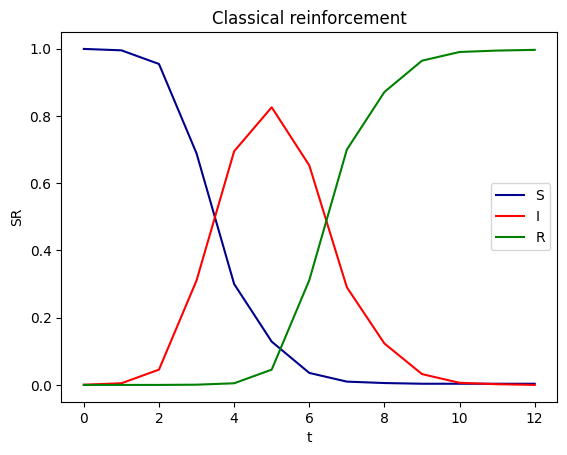

In [14]:
# Define plot
fig, ax = plt.subplots()

# Define color palette
custom_palette = ['darkblue', 'red', 'green']  # Add more colors if needed

# Classical
sns.lineplot(data=data_classical['random'], x='t', y='SR', label='S', color=custom_palette[0], ax=ax)
sns.lineplot(data=data_classical['random'], x='t', y='IR', label='I', color=custom_palette[1], ax=ax)
sns.lineplot(data=data_classical['random'], x='t', y='RR', label='R', color=custom_palette[2], ax=ax)

ax.set_title('Classical reinforcement');

### Parameter variation

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

# Classical reinforcement
beta = [0.1,0.3,0.5,0.7]
gamma = 3
trigger = 'classical'

for b in beta:
    data_classical = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)
    sns.lineplot(data=data_classical['random'], x='t', y='IR+RR', label='S', color=custom_palette[0], ax=ax)


### Targeted attack

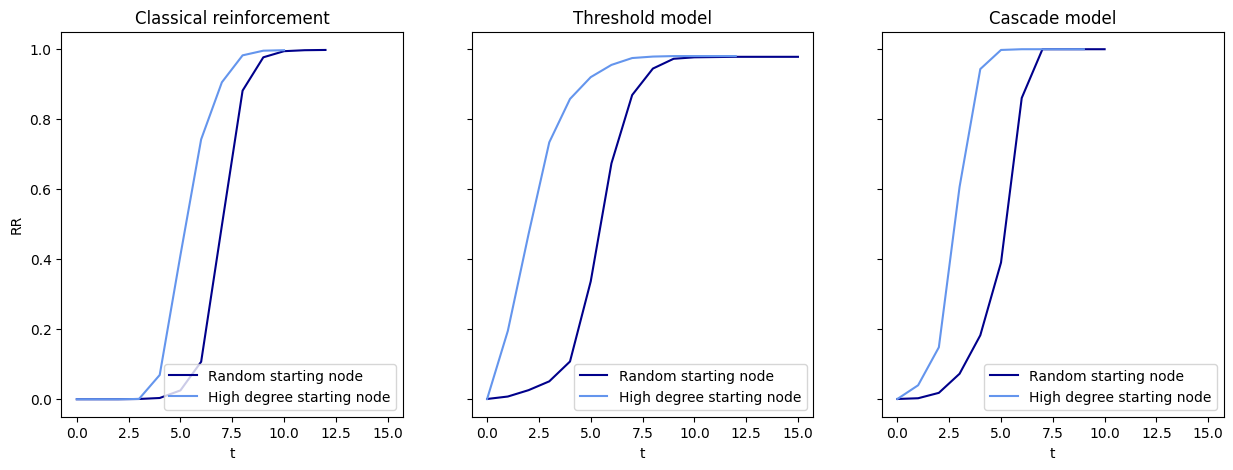

In [45]:
# Define plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Define color palette
custom_palette = ['darkblue', 'cornflowerblue']  # Add more colors if needed

# Classical
sns.lineplot(data=data_classical['random'], x='t', y='RR', label='Random starting node', color=custom_palette[0], ax=ax[0])
sns.lineplot(data=data_classical['degree'], x='t', y='RR', label='High degree starting node', color=custom_palette[1], ax=ax[0])

# Threshold
sns.lineplot(data=data_threshold['random'], x='t', y='IR', label='Random starting node', color=custom_palette[0], ax=ax[1])
sns.lineplot(data=data_threshold['degree'], x='t', y='IR', label='High degree starting node', color=custom_palette[1], ax=ax[1])

# Cascade
sns.lineplot(data=data_cascade['random'], x='t', y='IR', label='Random starting node', color=custom_palette[0], ax=ax[2])
sns.lineplot(data=data_cascade['degree'], x='t', y='IR', label='High degree starting node', color=custom_palette[1], ax=ax[2])

ax[0].set_title('Classical reinforcement');
ax[1].set_title('Threshold model');
ax[2].set_title('Cascade model');

### Parameter variation

In [9]:
fig, ax = plt.subplots(len(gamma), len(beta), figsize=(20,10), sharex=True, sharey=True)

# Define a custom color palette
custom_palette = ['green', 'hotpink','blue','orange']  # Add more colors if needed

for i, g in enumerate(gamma):
    for j, b in enumerate(beta):

        # Get data
        data = get_spreading_data(G, b, g, starting_nodes, trigger, metrics)
        visualise_spreading(data, custom_palette, ax[i,j])

        ax[i,j].set_title(f'g:{g}, b:{b}')

TypeError: object of type 'int' has no len()

### Threshold model

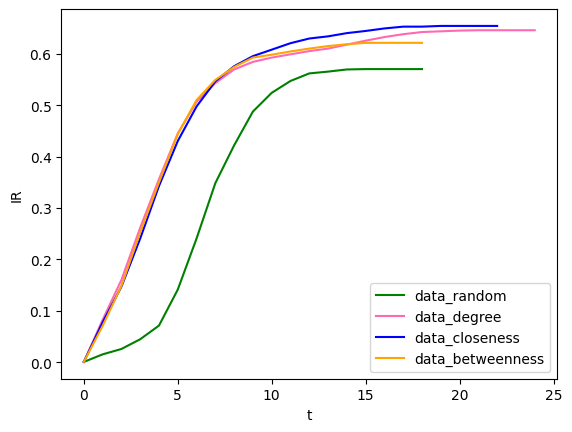

In [11]:
# Classical reinforcement
beta = 0.3 # Probability of being infected when we reach kappa threshold
gamma = 3 # Round of being infectious before being moved to recovered
kappa = 4 # Number of neighbors that make you in risk of being infected
trigger = 'threshold'

# Define color palette
custom_palette = ['green', 'hotpink','blue','orange']  # Add more colors if needed

# Define plot
fig, ax = plt.subplots()

# Plot dat
data = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics, kappa)
visualise_spreading(data, custom_palette, ax)

In [10]:
# Classical reinforcement
beta = [0.2, 0.4, 0.6, 0.8]
gamma = [1, 3, 5]
kappa = 1
trigger = 'threshold'

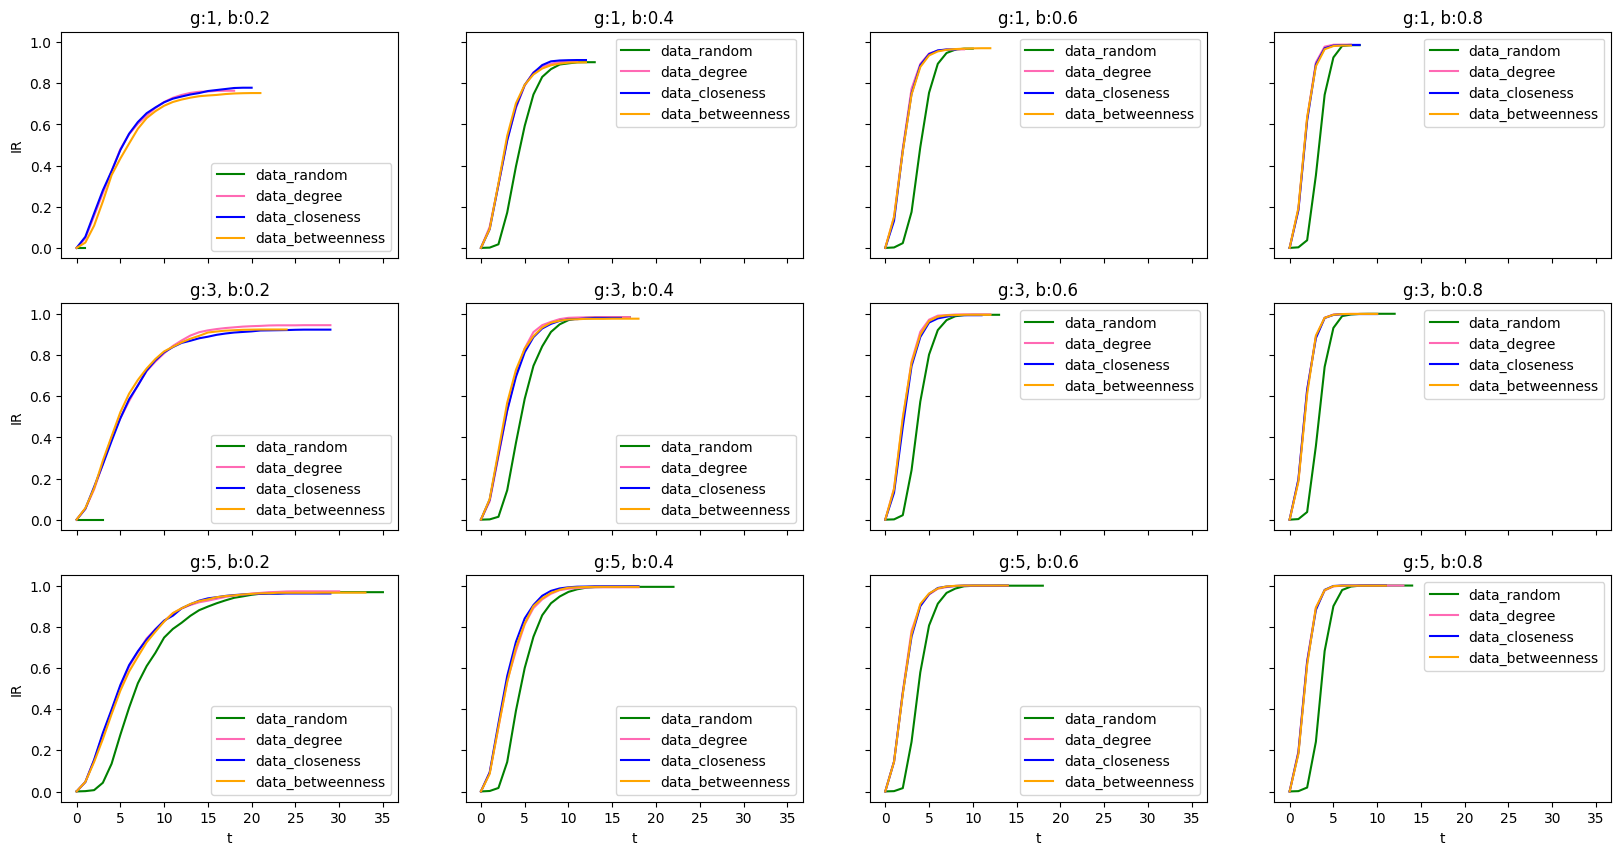

In [12]:
fig, ax = plt.subplots(len(gamma), len(beta), figsize=(20,10), sharex=True, sharey=True)

# Define a custom color palette
custom_palette = ['green', 'hotpink','blue','orange']  # Add more colors if needed

for i, g in enumerate(gamma):
    for j, b in enumerate(beta):

        # Get data
        data = get_spreading_data(G, b, g, starting_nodes, trigger, metrics, kappa)
        visualise_spreading(data, custom_palette, ax[i,j])

        ax[i,j].set_title(f'g:{g}, b:{b}')

### Cascade model

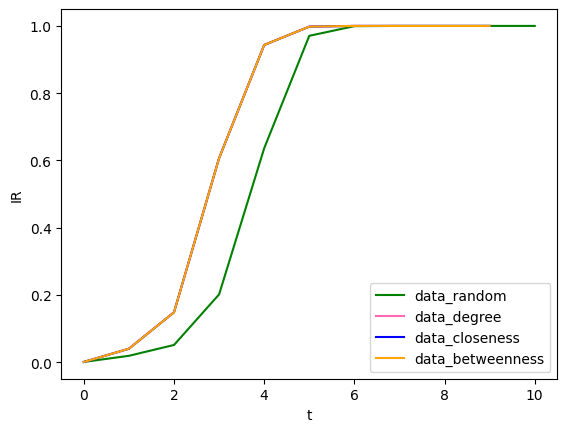

In [20]:
# Cascade model
beta = 0.05 # Fraction of neighbors
gamma = 3 # Rounds of 
trigger = 'cascade'

# Define color palette
custom_palette = ['green', 'hotpink','blue','orange']  # Add more colors if needed

# Define plot
fig, ax = plt.subplots()

# Plot dat
data = get_spreading_data(G, beta, gamma, starting_nodes, trigger, metrics)
visualise_spreading(data, custom_palette, ax)

In [22]:
data['data_betweenness']

,t,IR
0,0,0.000700
1,1,0.039888
2,2,0.148355
3,3,0.606718
4,4,0.943317
5,5,0.997901
6,6,1.000000
7,7,1.000000
8,8,1.000000
9,9,1.000000


In [23]:
data['data_degree']

,t,IR
0,0,0.000700
1,1,0.039888
2,2,0.148355
3,3,0.606718
4,4,0.943317
5,5,0.997901
6,6,1.000000
7,7,1.000000
8,8,1.000000
9,9,1.000000


In [24]:
data['data_closeness']

,t,IR
0,0,0.000700
1,1,0.039888
2,2,0.148355
3,3,0.606718
4,4,0.943317
5,5,0.997901
6,6,1.000000
7,7,1.000000
8,8,1.000000
9,9,1.000000


In [25]:
starting_nodes

{'random': ['144'],
 'degree': ['17'],
 'closeness': ['17'],
 'betweenness': ['17']}